<a href="https://colab.research.google.com/github/osnove/Dodatno/blob/master/oe1_Q_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <center> Uporaba Jupyer Python online zvezka za izračune in izrise grafov 
</center>

<center> Dejan Križaj, 2019 </center>

<br>

**Namen:** Z izvajanjem in študijem primerov v tem zvezku se boste naučili uporabljati Jupyter zvezek za izračune funkcij in različne načine njihove grafične predstavitve.  


<br>
<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
<br>    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika. Več podobnih primerov je na <a href="https://github.com/osnove/Dodatno/"> Githubu </a>  
</div>


<br>
<b> Način izvajanja:</b> S klikom na tekst se ga lahko editira, s Ctrl Enter se zažene eno celico, z Runtime/Run all pa se osveži celoten zvezek (notebook). Ker se pogosto izvajanje naslednje celice navezuje na rešitev prejšnje, jih je potrebno zagnati eno za drugo ali pa vse naenkrat.

<center>

(Po potrebi poglej https://colab.research.google.com/notebooks/welcome.ipynb za osnovne informacije o uporabi Colab-a.)


<br>

<b> Sproti rešuj male "programerske" izzive in se nauči dela z Jupytrom. </b>
</center>

***


## Naboj v odvisnosti od časa in tok kot odvod naboja po času

Za primer bomo vzeli elektrenje kondenzatorja s tokom. Izkaže se, da je to elektrenje eksponentna funkcija, odvisna od časovne konstante $\tau=RC$. 

Izrisali bomo naboj kot funkcijo časa

$Q(t) = 5\left( {1 - {e^{ - \frac{t}{{10{\rm{\: s}}}}}}} \right){\rm{mC}}$

ter tok kot odvod naboja po času

$i(t) =\frac{d Q}{dt}=0.5{e^{-t/10 \: \rm s}} \: \rm mA $


### Predpriprava za začetnike - Supernakratko o nizih (vektorjih) 
Želimo narediti niz vrednosti in izračunati funkcijo za te vrednosti. Na primer, niz (ali vektor) z vrednostmi od 0 do 5 naredimo preprosto takole:  
x=[0,1,2,3,4]. Ta izraz lahko preiskusiš tako, da narediš novo celico (klikneš +Code) in zaženeš z Ctrl-Enter. Izgleda, kot da se ni zgodilo nič, v resnici se je ukaz izvedel in v x so spravljene vrednosti kot zapisano. To lahko preveriš tako, da pod to vrstico napišeš x ali display(x) ali print(x) in izpisala se bo vrednost x-a. Nize (vektorje) naredimo pogosto z ukazi kot npr. y=range(4). Toda pozor: python začne šteti z 0 in ne 1. Range(4) torej naredi niz štirih vrednosti, 0,1,2,3. Vrednost posameznega elementa v nizu dobimo z y[indeks], kjer ima lahko indeks vrednosti od 0 do 3. Lahko uporabimo tudi ukaz arange iz modula Numpy, npr. z=np.arange(0,11,2), ki naredi niz od 0 do 10 s korakom 2. Podoben je ukaz s=np.linspace(0,10,6), ki naredi niz od 0 do 10 razdeljen na 6 
števil z enakim razmikom. Na nizih lahko delamo enake operacije, kot bi jih delali s številom. Npr. ukaz p=2*s+3 pomnoži vse vrednosti niza s z 2 in jim prišteje 3.

In še beseda o matematičnih funkcijah. Običajno jih vsebuje modul Numpy. Npr. np.pi vrne vrednosti $\pi$, np.sin(x) vrne sinus x-a, np.exp(x) vrednost(i) eksponentne funkcije, itd. Če je x niz, bo niz tudi rezultat operacije. 

In [59]:
x=[0,1,2,3,4]
print(x)
y=range(4)
print(y[3])
y=np.arange(5)
display(y)
z=np.arange(0,11,2) 
print(z)
s=np.linspace(0,10,6)
print(s)
p=2*s+3
print(p)
a=np.sin(x)
print(a)
b=np.exp(x)
print(b)

[0, 1, 2, 3, 4]
3


array([0, 1, 2, 3, 4])

[ 0  2  4  6  8 10]
[ 0.  2.  4.  6.  8. 10.]
[ 3.  7. 11. 15. 19. 23.]
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
[ 1.          2.71828183  7.3890561  20.08553692 54.59815003]


<b> Zdaj pa ti: </b>
* Naredi niz (vektor) t, ki bo imel vrednosti od 0 do 30, s korakom po 0.1. Nato naredi še niz Q, ki bo ustrezal funkciji $Q(t) = 5\left( {1 - {e^{ - \frac{t}{{10}}}}} \right)$. Za rešitev poglej spodnjo celico z izračunom in izrisom.

## Izračun in izris toka kot funkcije časa v grafu

Jupyter je zasnovan na programskem jeziku Python. Za matematične operacije pogosto uporabljamo knjižnico Numpy, za izrise pa knjižnico Matplotlib. Pred začetkom dela je potrebno v kodo vnesti knjižnice (module), ki jih želimo uporabljati.

In [0]:
# vnos potrebnih knjižnic, matplotlib za grafe in numpy za matematične operacije
#%matplotlib inline # potreben ukaz, da se slike izrišejo v notebooku
import matplotlib
import matplotlib.pyplot as plt
import numpy as np  # np bo okrajšava za ukaze iz knjižnice numpy


### Najpreprostejši način izračuna in izrisa

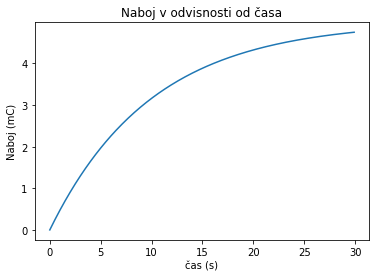

In [62]:
# kreiranje časovnega niza od 0 do 30 s korakom 0.1
t = np.arange(0.0, 30.0, 0.1) # np. pomeni, da gre za uporabo funkcije iz knjižnice numpy
# Izračun naboja
Q = 5*(1-np.exp(-t/10))

# Priprava slike
plt.figure()  # plt. pomeni, da gre za uporabo knjižnice matplotlib
plt.plot(t, Q)

plt.xlabel('čas (s)')
plt.ylabel('Naboj (mC)') 
plt.title('Naboj v odvisnosti od časa')
plt.show()

### Nekoliko drugačen način - subplot

Subplot omogoča več načinov izrisa in naslavljanja grafov.

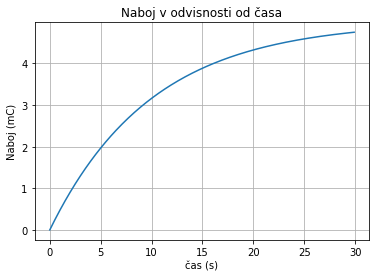

In [58]:
# kreiranje časovnega niza od 0 do 30 s korakom 0.1
t = np.arange(0.0, 30.0, 0.1)
# Izračun naboja
Q = 5*(1-np.exp(-t/10))

# Priprava slike
fig, ax = plt.subplots()
ax.plot(t, Q)

ax.set(xlabel='čas (s)', ylabel='Naboj (mC)', # Označitev osi
       title='Naboj v odvisnosti od časa')
ax.grid()
plt.show()

<b> Zdaj pa ti: </b>
* Spremeni kodo tako, da boš namesto naboja kot funcijo časa izrisal krivuljo toka kot funkcijo časa. 
*  Spremeni kodo tako, da boš izrisal  krivuljo za čase od 0 do 50 s.
* Spremeni kodo tako, da dodaš enako krivuljo, ki pa bo dodala le pike v redkih točkah. Namig: kreiraj še en niz z manj točkami in izračunaj Q za ta niz in ga izriši z dodanim ukazom ax.plot(t1,Q1,'o'). (Rešitev je na koncu zvezka)


## Hkraten izris toka in naboja na enem grafu



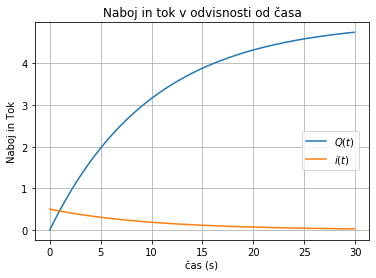

In [4]:
# vnos knjižnic in izračun naboja smo opravili že v prejšnji celici
# dodamo še izračun toka
i=0.5*np.exp(-t/10)
# Priprava slike
fig, ax = plt.subplots()
ax.plot(t, Q, label="$Q(t)$") # oznake so lahko LaTex oblike
ax.plot(t, i, label="$i(t$)")
# pozicioniranje legende
ax.legend(bbox_to_anchor=(0.8,.5), loc='upper left',  borderaxespad=0.) 

ax.set(xlabel='čas (s)', ylabel='Naboj in Tok',
       title='Naboj in tok v odvisnosti od časa')
ax.grid()
plt.show()

<b> Zdaj pa ti: </b>
* preoblikuj obliko krivulj, na primer barvo, debelino, črtkano črto itd. Pri tem si pomagaj s primeri na strani https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html ali spremeni ustrezno tole vrstico plt.plot( x,y, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)


## Izris dveh krivulj na enem grafu z ločenima osema

V prejšnjem primeru smo izrisali obe krivulji na istem grafu. Ker imata tok in naboj različne enote, je bolj primerno izrisati vsako krivuljo na svoji osi. Ena varianta je, da izrišemo na istem grafu dve krivulji vendar z različnima ordinatnima osema.

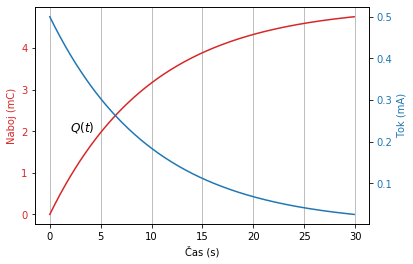

In [5]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Čas (s)')
ax1.set_ylabel('Naboj (mC)', color=color)
ax1.plot(t, Q, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='x')
ax1.text(2, 2, r'$Q(t)$', fontsize=12)

ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota
color = 'tab:blue'
ax2.set_ylabel('Tok (mA)', color=color)  
ax2.plot(t, i, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

<b> Zdaj pa ti: </b>
* Z ax1.text smo dodali tekst Q(t) nad krivuljo, glede na koordinate krivulje. Q(t) je znotraj znakov $$, ker se jih vpisuje kot enačbo. Dodaj še i(t) na ustrezno mesto na grafu. Namig: Lahko dodamo še en ukaz ax1.text, s tem, da bo za kooridato lokacije upoštevana Y os od prvega plota. Če dodamo ukaz ax2.text, bo upoštevana Y os od drugega plota.
* Namesto, da vpišemo koordinate lokacije teksta, lahko lokacijo določimo z indeksom v nizu časa in funkcije, torej kot t[indeks],Q[indeks]. Če imamo označene krivulje s tekstom, ne potrebujemo različnih barv. To je včasih koristno, npr. pri črno-belem tiskanju. (Rešitev je na koncu zvezka)


## Izris obeh krivulj v ločenih grafih
Namesto na enem grafu z dvema različnima osema narišimo krivulji v dveh grafih, npr. enega pod drugim. Pri tem dodamo še eno x os z manj točkami, ki omogoča izris krivulje in simbolov na krivulji. (Če bi izrisali simbole na originalni x osi, bi se prekrivali in bi delovalo kot ena debela črta. Če pa bi izrisali funkcijo le v malo točkah, ne bi delovala dovolj zvezno.)

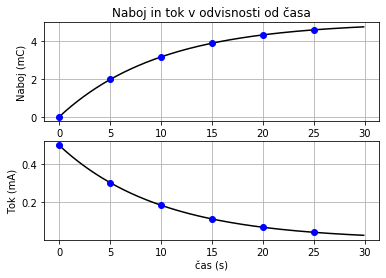

In [6]:
t1 = np.arange(0.0, 30.0, 5)
# Izračun naboja in toka v manj točkah
Q1= 5*(1-np.exp(-t1/10))
i1= 0.5*np.exp(-t1/10)

plt.figure()
plt.subplot(211)
plt.plot(t, Q, 'k', t1, Q1, 'bo')
plt.ylabel('Naboj (mC)')
plt.title('Naboj in tok v odvisnosti od časa')
plt.grid()

plt.subplot(212)
plt.plot(t, i, 'k', t1, i1, 'bo')
plt.ylabel('Tok (mA)')
plt.xlabel('čas (s)')

plt.grid()
plt.show()

<b> Zdaj pa ti: </b>
* Včasih je primerno postaviti tudi en graf poleg drugega. Nadomesti plt.subplot(211) in plt.subplot(212) z plt.subplot(121) in plt.subplot(122).
* Če je graf premajhen, ga povečaj z dodatkom figsize: npr. plt.figure(figsize=(15, 8)). Potem je potrebno ustrezno popraviti tudi označevanje osi. Dodatno: za vse grafe v zvezku se spremeni nastavitve velikosti grafov z plt.rcParams["figure.figsize"] = (10,10)
* Več o subplots na https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html 



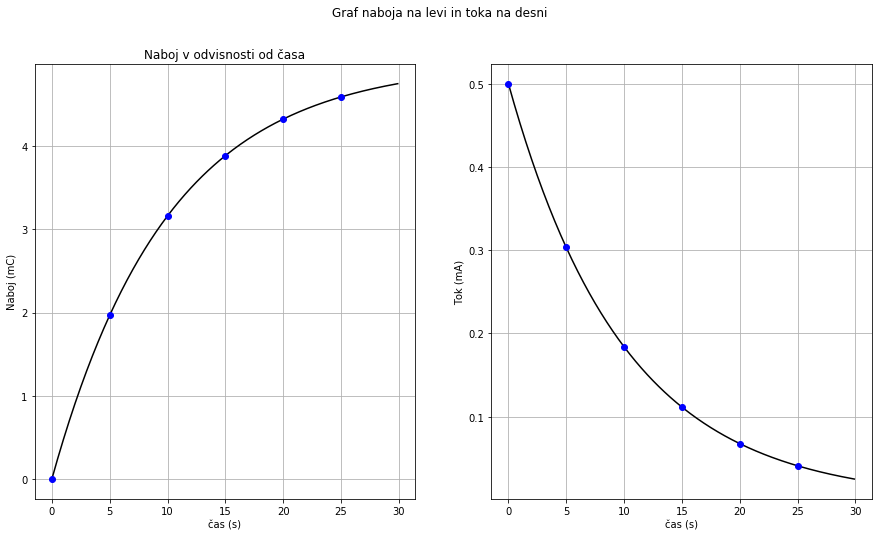

In [7]:
t1 = np.arange(0.0, 30.0, 5)

# Izračun naboja in toka v manj točkah
Q1= 5*(1-np.exp(-t1/10))
i1= 0.5*np.exp(-t1/10)

plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.plot(t, Q, 'k', t1, Q1, 'bo')
plt.xlabel('čas (s)')
plt.ylabel('Naboj (mC)')
plt.title('Naboj v odvisnosti od časa')
plt.grid()

plt.suptitle('Graf naboja na levi in toka na desni')

plt.subplot(122)
plt.plot(t, i, 'k', t1, i1, 'bo')
plt.ylabel('Tok (mA)')
plt.xlabel('čas (s)')

plt.grid()
plt.show()

## Več krivulj na enem grafu z različnimi parametri

Pogosto nas zanima, kako določen parameter vpliva na spremembo oblike krivulje. Obstaja več načinov, kako to narediti.

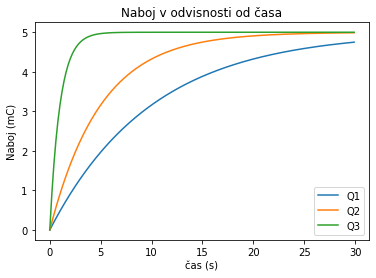

In [8]:
# kreiranje časovnega niza od 0 do 30 s korakom 0.1
t = np.arange(0.0, 30.0, 0.1)
# Izračun naboja
Q = 5*(1-np.exp(-t/10))
Q2 = 5*(1-np.exp(-t/5))
Q3 = 5*(1-np.exp(-t/1))

# Priprava slike
plt.figure()
plt.plot(t, Q,label='Q1')
plt.plot(t, Q2,label='Q2')
plt.plot(t, Q3,label='Q3')


plt.xlabel('čas (s)')
plt.ylabel('Naboj (mC)')
plt.title('Naboj v odvisnosti od časa')

plt.legend()
plt.show()

### Naboj kot funkcija

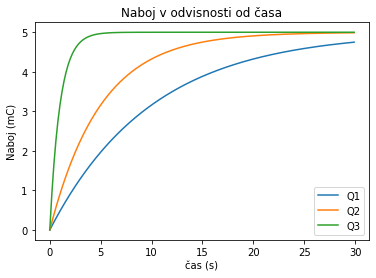

In [9]:
# kreiranje časovnega niza od 0 do 30 s korakom 0.1
t = np.arange(0.0, 30.0, 0.1)
# Naboj kot funkcija 
def Q(tau):
   return 5*(1-np.exp(-t/tau))

tau=[10,5,1]
labela=['Q1','Q2','Q3']

plt.figure()

# Zanka, ki se izvrši večkrat in iterira (povečuje) indeks i
for i in range(3): 
  plt.plot(t, Q(tau[i]),label=labela[i])

plt.xlabel('čas (s)')
plt.ylabel('Naboj (mC)')
plt.title('Naboj v odvisnosti od časa')

plt.legend()
plt.show()


<b> Zdaj pa ti: </b>
* Zapiši funkcijo toka in izriši krivulje za več vrednosti $\tau$.
* Spremeni oblike krivulj tako, da bodo vse črne in različnih oblik (črtkano, ...). Poglej https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html . Rešitev je na koncu zvezka.

***
## Dodatne informacije

Za osnovno delo z grafi si poglej spletno stran
https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

(kodo lahko spreminjate v tem zvezku (notebooku) ali pa kreirate novega z File/New Python 3 Notebook in preizkušate različne variante izrisov)

Primeri iz Codelaba: https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=WALI8x49GUpe

***

## Rešitve izzivov - Zdaj pa ti

In [0]:
# Izris dodatnih pik na krivulji
# kreiranje časovnega niza od 0 do 30 s korakom 0.1
t = np.arange(0.0, 30.0, 0.1)
t1 = np.arange(0.0, 30.0, 5)
# Izračun naboja
Q = 5*(1-np.exp(-t/10))
Q1= 5*(1-np.exp(-t1/10))

# Priprava slike
fig, ax = plt.subplots()
ax.plot(t, Q)
ax.plot(t1,Q1,'o')

ax.set(xlabel='čas (s)', ylabel='Naboj (mC)', # Označitev osi
       title='Naboj v odvisnosti od časa')
ax.grid()
plt.show()

In [0]:
# mali programerski izziv - tekstovna označitev krivulj
i=0.5*np.exp(-t/10)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Čas (s)')
ax1.set_ylabel('Naboj (mC)')
ax1.plot(t, Q)
ax1.tick_params(axis='y')
ax1.grid(axis='x')
ax1.text(t[15], Q[10], r'$Q(t)$', fontsize=12)

ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota
ax2.set_ylabel('Tok (mA)')  
ax2.plot(t, i)
ax2.tick_params(axis='y')
ax2.text(t[15], i[10], r'$i(t)$', fontsize=12)
plt.show()

In [0]:
# Naboj kot funkcija
# kreiranje časovnega niza od 0 do 30 s korakom 0.1
t = np.arange(0.0, 30.0, 0.1)
# Naboj kot funkcija 
def Q(tau):
   return 5*(1-np.exp(-t/tau))

tau=[10,5,1]
labela=['Q1','Q2','Q3']
# labela=['$Q_1(t)$','$Q_2(t)$','$Q_3(t)$']  # Odkomentiraj za lepši izpis
lstil=['-','--',':']

plt.figure()

# Zanka, ki se izvrši večkrat in iterira (povečuje) indeks i
for i in range(3): 
  plt.plot(t, Q(tau[i]),label=labela[i],ls=lstil[i],color='k')

plt.xlabel('čas (s)')
plt.ylabel('Naboj (mC)')
plt.title('Naboj v odvisnosti od časa')

plt.legend()
plt.show()
